**Recommendation Systems:** 
It is an automated system which can recommend relevant items to the user based on his previous interactions with the items.

** Methods to build Recommendation System :**

* **Content-Based Recommendation System:** Filter the keytopics from the document where user interested and interacted with and train the model with those keywords to provide the relevant document to the user. Eg: User watched "The Olypus has Fallen" & "White House Down" the interacted data will be the gener of the movie like action , rescue , president etc movie artists,director etc  so the recommendation system will be trained according to that it and it will suggests "London Has Fallen" ,"Paris" etc.
![CB][2]
[2]: https://image.slidesharecdn.com/trustrecsys-130710205719-phpapp02/95/trust-and-recommender-systems-7-638.jpg?cb=1373490026

* **Collabrative Filtering:** Identifying the similarity with user and items interactions and find the best similar user/item for the target user , this similarity data act as the interaction dataset for the recommendation systems and some clustering , similarity algorithms it will be trained. Eg:  Find the chan rating by caluclating the simalrity of the chan neighbouring user.
![CF][1]
[1]: http://4.bp.blogspot.com/-D6ei8i-APx8/Vn4e8nr9QeI/AAAAAAAAAZc/2vOjvjBKnRQ/s1600/item_item_collaborative_filtering1.jpg

* **Hybrid Recommendation System:** A system that combines content-based filtering and collaborative filtering could take advantage from both the representation of the content as well as the similarities among users. If we make the recommendation system more personalized to the user then the chances of purchasing the item will be high.
In this example the user and the item keyword interactions are collected ( Content Based ) and finding the simalirty of the item keytopics (Collabrative) . After training the model we found that Fago likes the movie indicated by "+" or dislike the movie "-" .
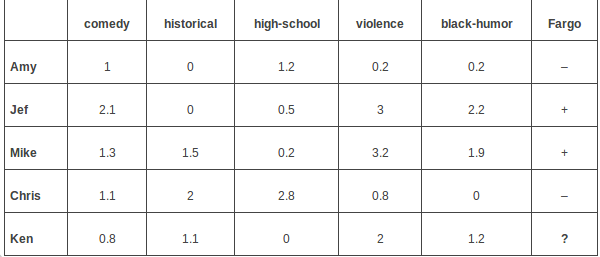


**Framework for Recommendation Systems:** The working of recommendation systems is splitted into various layers as per in the below diagram . we will discuss all the layers in detail.
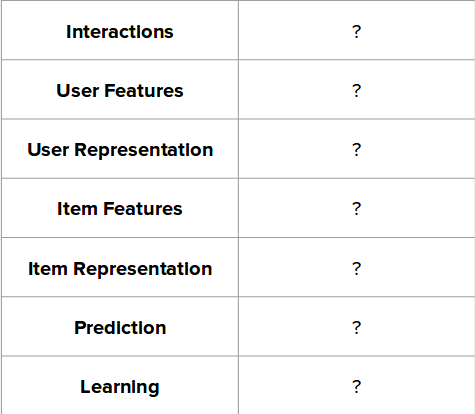

* **Interactions:** Denotes the item which the user interact with.To get the interaction data of the user we use two major methodoligies they are explicit feedback and implicit feedback .**Explicit Feedback** means getting the feedback of the user for the feedback by getting the user feedback by means of survey , rating column and reviews ( Some user can vounteerly involved for this process but the majority wont) This method is effective when large nuber of user interact with it.**Implicit Feedback ** is getting the user interactions by montioring the user behaviour in their domain or with item ex: number of clicks , threshold time , searching relevant content of that item ( Mostly this will be used as a primary dataset to train the recommendation systems ).




* **User Features:** Describe the qualities and properties of the user invloved which he demand in that product . Eg User A may like movie with genre love , crush , romance these are the properties of the user and many other are there .

*  **User Repersentation:** This is also one type of interactions called the user interactions . To represent it we use sparse matrix(the matrix which has very little filled value and the non-interacted place are left unfilled.
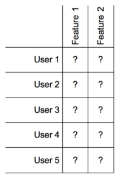

* **Item Features:**: It descibe the features of the item and its key values. Eg Car as the item and its features are model,company,engine,speed etc .

* **Item Representation:** It represent the item feature values as sparse matrix because matrix format is easty to compute and also embedding with the other representation.
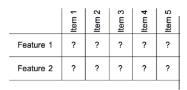


**NOTE:** There are other famous representation it depends on how we are going to use in the data in what model .Other representation are ** Linear Kernels,Deep Nets,Word2Vec( Basically used for document recommendation) , Autoencoders etc **

* **Prediction:** By using the user and item profiles we compute the utility matrix . This matrix contains the the similarity value of the user with each item (the higher the similarity value the user most prefer that ) and its done by using content-based or collabrative filtering or hybrid methods . Many algorithms are invloved in calculating the similarity value and also  ranking the items based on the values in the recommendation methods.Let us discuss some majorly used algorithms for calulating simalrity values .
  * **Cosine Similarity:** The cosine similarity function uses the difference in the direction that two articles go, i.e. the difference in angle between two article directions.Less the distance or angle the more similar they are.
![3](https://lh4.googleusercontent.com/SodVc3Xo77b8LhEjqXymSaA-bI-kQdPeY8uG-J0wSSp5q-pxVAf_rPMUX9Y)

  * **Dot Product:** Calculating the similarity by taking dot product of the user and item vector and fitting linear to the model.
  
  * **Eucledian Distance:**  It is the distance between the target user and their similar user by means of their item properties and user properties . The distance is calculated by using the formula mentioned below. This used like a nearest neighbour concept to map the neighbours of the target.
![4](https://chrisjmccormick.files.wordpress.com/2013/08/2d_euclidean_distance_illustration.png)  


  

* ** Learning:** After mapping all the similarity values for the utility matrix we can directly evaluate the loss or rank the similar item for the user  like top@k ( Show the top k item for the user )  using ranking algorithm (Ranking can used to improve accuracy than directly using the similarity value ) . There are four major evaluation metrics to calculate the performance of the model in terms of prediction values ( Similarity Value ) 

 Before calculating the loss you should understand some terminology for evaluation metrics 
* **TRUE POSITIVE:** The items or products which are correctly recommended to the user by the system
* **FALSE POSITIVE:** The items or products which are left by the system to recommend
* **TRUE NEGATIVE:** The items or products which are not correctly recommended by the system
* ** FALSE NEGATIVE:** The items or products which are wrongly recommended by the system 
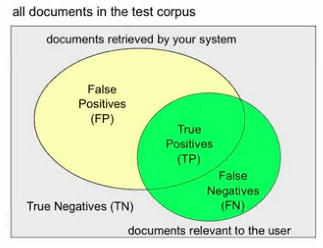
![5](https://cdn-images-1.medium.com/max/800/1*CPnO_bcdbE8FXTejQiV2dg.png)   

To understand the tradeoff between precision and recall let us describe with a simple example: First we have to convert all the predicted values to a binary representation ( 1 he likes the recommendation or 0  not likes the recommendation) For that we have to choose a threshold value incase of movie rating we can choose 3.5 as threshold value
if a movie rating > 3.5 ( Liked ) or movie rating  < 3.5 (disliked) this will convert all the interactions value to binary representations. Now set the k value as we said above to rank and k act as the top k values which can be used for learning. Eg : item_1 , item_5,item_10 which are top@3 relevant items to the user this is called as relevant items. Now our recommendation predicts the top@3 items for user this is called as recommended items.

* **Precision:** Precision is the proportion of recommendations that are relevant in the recommended top@k. Formula to calculate the precision is: **No of relevant item recommeded / No of recommended items **. In terms of example : recommended items are item_10,item_1,item_6 there are 2 relevant items . The precision is 2/3 = 66.67% .The accurate precision is 100%.

* **Recall:** Recall is the proportion of good recommendations that appear in top recommendations . Formula to calculate the recall is : **No of relevant items recommended in top@k / Total No of relevant items** we know the top@3 relevant item for user and that is meant to be total no of relevant items.In term of example : item_10,item_1,item_6 are the recommended items and only two relevant items are from the total no of relevant items therefore 2/3 : 66.67% .The accurate recall is 100%.


           

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from lightfm import LightFM # LightFM Recommendation tool
from sklearn.model_selection import train_test_split #to split the train and test data
import matplotlib.pyplot as plt

from lightfm import evaluation

from scipy.spatial.distance import correlation, cosine
from sklearn.metrics import pairwise_distances

from scipy import sparse #to convert dataframe to sparse matrix
from lightfm import cross_validation
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Importing the DataSet**

In [ ]:
movie_df=pd.read_csv("../input/movies.csv")
ratings_df=pd.read_csv("../input/ratings.csv")
links_df=pd.read_csv("../input/links.csv")
tag_df=pd.read_csv("../input/tags.csv")

Now we keep the threshold value for the user by their ratings and also drop the timestamp column 

In [ ]:
ratings_df=ratings_df.loc[ratings_df['rating']== 5]
ratings_df=ratings_df.drop(['timestamp'],axis=1)
ratings_df.loc[ratings_df.rating == 5.0 , 'rating'] = 1
ratings_df[['rating']] = ratings_df[['rating']].astype(int)
ratings_df

**Creating Utility Matrix from the Dataset**

In [ ]:
R_df=ratings_df.pivot(index='userId',columns='movieId',values='rating').fillna(0).astype(int)
interactions=sparse.csr_matrix(R_df.values)
data = 1-pairwise_distances(interactions, metric="cosine")
R_df.shape

In [ ]:
temp=[]

for row in R_df.iterrows():
    index, data = row
    temp.append(data.tolist())

**SPLIT THE TRAIN AND TEST DATA**

In [ ]:
train_df,test_df=cross_validation.random_train_test_split(interactions, test_percentage=0.2, random_state=None)

**USING LIGHTFM**

LightFM is a Python implementation of a number of popular recommendation algorithms for both implicit and explicit feedback, including efficient implementation of BPR and WARP ranking losses. It's easy to use, fast (via multithreaded model estimation), and produces high quality results.

It also makes it possible to incorporate both item and user metadata into the traditional matrix factorization algorithms. It represents each user and item as the sum of the latent representations of their features, thus allowing recommendations to generalise to new items (via item features) and to new users (via user features).

**MODEL LOSS**
* **WARP ( Weighted Approxiamte Rankwise Pair ) :**  

In [ ]:
model_loss=[]
precision=[]
recall=[]
auc=[]

In [ ]:
# Instantiate and train the model using warp
model = LightFM(loss='warp')
model.fit(train_df, epochs=30, num_threads=2)

# Testing the model using precision_at_k for the warp model
test_precision = evaluation.precision_at_k(model, test_df, k=5).mean()
precision.append(test_precision)
print(test_precision)

# Testing the model using recall_at_K for the warp model
test_recall = evaluation.recall_at_k(model, test_df,k=5).mean()
recall.append(test_recall)
print(test_recall)

# Testing the model using auc_score for the warp model
test_auc = evaluation.auc_score(model,test_df).mean()
auc.append(test_auc)
print(test_auc)

# Preparing data for visulaization
model_loss.append("warp")

In [ ]:
# Instantiate and train the model using bpr
model = LightFM(loss='bpr')
model.fit(train_df, epochs=30, num_threads=2)

# Testing the model using precision_at_k for the bpr model
test_precision = evaluation.precision_at_k(model, test_df, k=5).mean()
precision.append(test_precision)
print(test_precision)

# Testing the model using recall_at_K for the bpr model
test_recall = evaluation.recall_at_k(model, test_df,k=5).mean()
recall.append(test_recall)
print(test_recall)

# Testing the model using auc_score for the bpr model
test_auc = evaluation.auc_score(model,test_df).mean()
auc.append(test_auc)
print(test_auc)

# Preparing data for visulaization
model_loss.append("bpr")



In [ ]:
# Instantiate and train the model using logistic
model = LightFM(loss='logistic')
model.fit(train_df, epochs=30, num_threads=2)

# Testing the model using precision_at_k for the logistic model
test_precision = evaluation.precision_at_k(model, test_df, k=5).mean()
precision.append(test_precision)
print(test_precision)

# Testing the model using recall_at_K for the logistic model
test_recall = evaluation.recall_at_k(model, test_df,k=5).mean()
recall.append(test_recall)
print(test_recall)

# Testing the model using auc_score for the logistic model
test_auc = evaluation.auc_score(model,test_df).mean()
auc.append(test_auc)
print(test_auc)

# Preparing data for visulaization
model_loss.append("logistic")



In [ ]:
# set width of bar
barWidth = 0.30
 
 
# Set position of bar on X axis
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, precision, color='#7f6d5f', width=barWidth, edgecolor='white', label='precision')
plt.bar(r2, recall, color='#557f2d', width=barWidth, edgecolor='white', label='recall')
plt.bar(r3, auc, color='#2d7f5e', width=barWidth, edgecolor='white', label='auc')
 
# Add xticks on the middle of the group bars
plt.xlabel('Loss', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], model_loss)

# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
 
# Create legend & Show graphic
plt.legend()
plt.show()



**Using Annoy**

In [ ]:
from __future__ import print_function
import random, time
from annoy import AnnoyIndex

try:
    xrange
except NameError:
    # Python 3 compat
    xrange = range

n, f = 644, 3127
precision=[]
metrics=["angular","euclidean","manhattan","hamming"]
for m in metrics:
    t = AnnoyIndex(f,metric=m)
    for i in xrange(n):
        t.add_item(i, temp[i])

    t.build(2 * f)
    t.save('test.tree')

    limits = [10]
    k = 10
    prec_sum = {}
    prec_n = 1000
    time_sum = {}

    for i in xrange(prec_n):
        j = random.randrange(0, n)

        closest = set(t.get_nns_by_item(j, k, n))
        for limit in limits:
            t0 = time.time()
            toplist = t.get_nns_by_item(j, k, limit)
            T = time.time() - t0

            found = len(closest.intersection(toplist))
            hitrate = 1.0 * found / k
            prec_sum[limit] = prec_sum.get(limit, 0.0) + hitrate
            time_sum[limit] = time_sum.get(limit, 0.0) + T

    for limit in limits:
        print('Using:',m)
        prec=100.0 * prec_sum[limit] / (i + 1)
        precision.append(prec)
        print('limit: %-9d precision: %6.2f%% avg time: %.6fs'
              % (limit, prec , time_sum[limit] / (i + 1)))


In [ ]:
#Visulaiztion
y_pos = np.arange(len(metrics))
 
# Create bars
plt.bar(y_pos, precision)
 
# Create names on the x-axis
plt.xticks(y_pos, metrics, color='black')
plt.yticks(color='black')
 
# Show graphic
plt.show()